# Filmes nas Plataformas de Stremings

O streaming é uma transmissão de dados de áudio ou video em tempo real de um servidor para um aparelho que seja possivel visualizar esses dados. Neste dataset estão contidos os filmes presentes em 4 plataformas de streaming: `Netflix`, `Hulu`, `Prime Video`, `Disney+`. Ele foi disponibilizado no [kaggle](https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney).

O objeto desta análise é tirar insigths acerca desses filmes em suas respectivas plataformas, comparando como cada variável se comporta dentro de cada plataforma, por exemplo, como a idade mínima dos filmes varia de um streaming para outro.

## Importando Bibliotecas e o Dataset

In [1]:
# Importando as Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando o Dataset

df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv.zip')

In [3]:
# Primeiras linhas do dataset

df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


Retirando colunas que não vamos usar na nossa análise

In [4]:
df.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [5]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   Age              5338 non-null   object 
 3   IMDb             9309 non-null   object 
 4   Rotten Tomatoes  9508 non-null   object 
 5   Netflix          9515 non-null   int64  
 6   Hulu             9515 non-null   int64  
 7   Prime Video      9515 non-null   int64  
 8   Disney+          9515 non-null   int64  
 9   Type             9515 non-null   int64  
 10  Directors        9104 non-null   object 
 11  Genres           9399 non-null   object 
 12  Country          9261 non-null   object 
 13  Language         9202 non-null   object 
 14  Runtime          9196 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 1.1+ MB


## Análise Exploratória de Dados

### Idade Mínima em cada plataforma

In [7]:
# Criando um dataset com os valores não nulos da coluna Age

df_age = df.copy()
df_age = df_age[df_age['Age'].notna()]

In [8]:
# Limpando a coluna Age e transformando a coluna em int

df_age['Age'] = df_age['Age'].str.replace('+','')
df_age['Age'] = df_age['Age'].str.replace('all','0')
df_age['Age'] = df_age['Age'].astype(int)

/tmp/ipykernel_52742/3325383796.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_age['Age'] = df_age['Age'].str.replace('+','')


In [9]:
# Função para cria gráfico de barras de cada streaming

def barplot(grid, df_prov, streaming,c):
    plt.subplot(grid)
    df_prov = df_prov.loc[df_prov[streaming] == 1]
    df_prov = df_prov['Age'].value_counts().reset_index()
    df_prov.columns = ['Age', 'Count']
    sns.barplot(x='Age', y='Count', data=df_prov, color=c)
    plt.xlabel('Age', fontsize=18)
    plt.ylabel(streaming, fontsize=18)

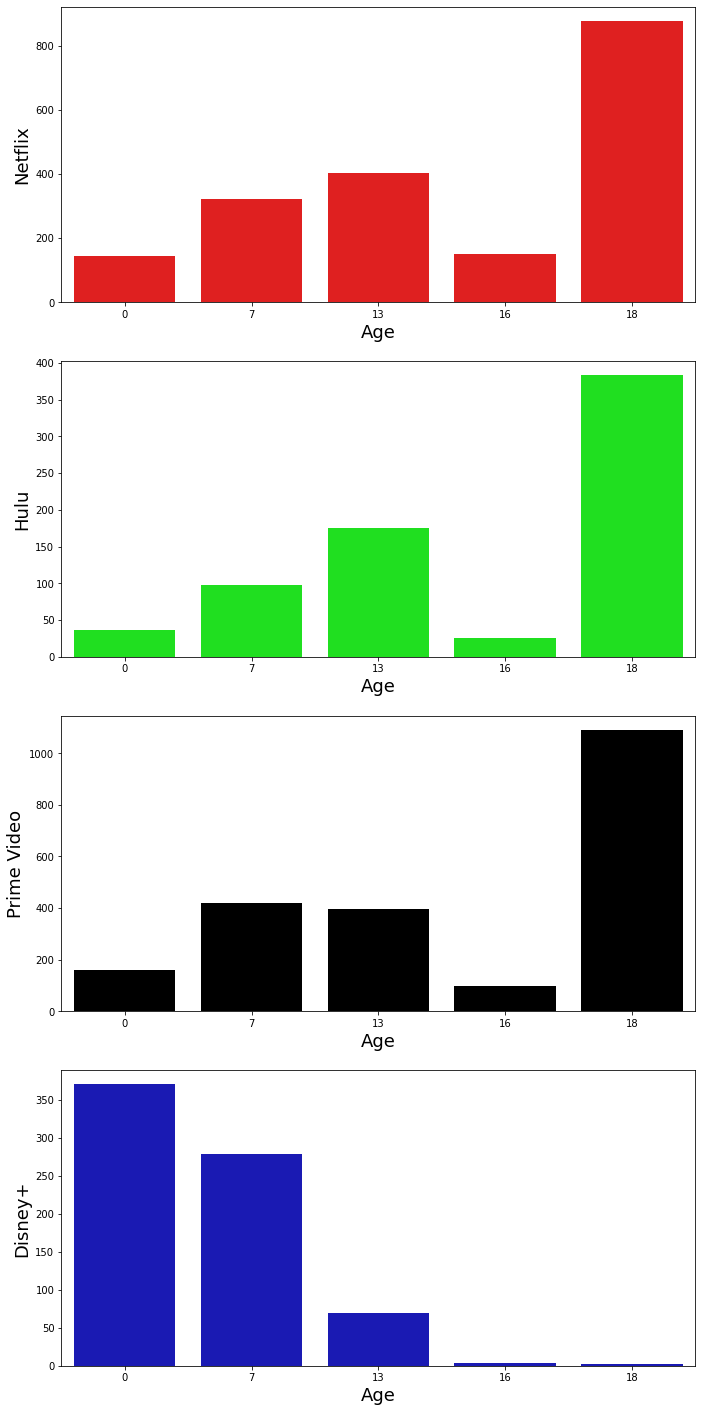

In [10]:
# Criando os gráficos de barras

plt.figure(figsize = (25,25))

barplot(421, df_age, 'Netflix','r')
barplot(423, df_age, 'Hulu','lime')
barplot(425, df_age, 'Prime Video','k')
barplot(427, df_age, 'Disney+','mediumblue')

Percebemos que em 3 das 4 plataformas a maioria dos filmes tem idade mínima `18` anos, com os outros filmes se distribuindo mais nas idades de `7` e `13`. A excessão fica por conta da plataforma `Disney+`, na qual a grande maioria dos filmes fica em `0` ou `7` anos, com alguns na classificação de `13` anos e apenas 7 filmes nas outras duas classificações

Isso se deve pela Disney+ ser um serviço de streaming de vídeo que contém apenas produções realizadas pela sua pŕopriedade [The Walt Disney Company](https://pt.wikipedia.org/wiki/The_Walt_Disney_Company), a qual é mundialmente conhecida pelos seus filmes infantis.

### Distribuição dos anos de produção dos filmes

<AxesSubplot:xlabel='Year', ylabel='Count'>

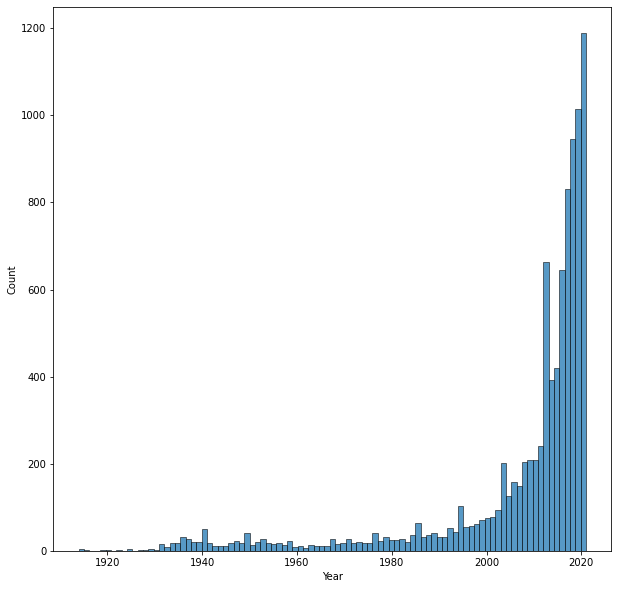

In [11]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='Year')

O histograma acima acerca dos anos de lançamento dos filmes mostra uma distorção à esquerda, ou seja, quanto maior o anor, maior é o número de filmes lançado naquele ano

### Distribuição dos filmes em cada plataforma

In [12]:
df_streaming = df.copy()

In [13]:
df_streaming['Streaming'] = ''
df_streaming['Streaming'].where(df_streaming['Netflix']==0,'Netflix', inplace=True)
df_streaming['Streaming'].where(df_streaming['Hulu']==0,'Hulu', inplace=True)
df_streaming['Streaming'].where(df_streaming['Prime Video']==0,'Prime Video', inplace=True)
df_streaming['Streaming'].where(df_streaming['Disney+']==0,'Disney+', inplace=True)

In [14]:
df_streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   Age              5338 non-null   object 
 3   IMDb             9309 non-null   object 
 4   Rotten Tomatoes  9508 non-null   object 
 5   Netflix          9515 non-null   int64  
 6   Hulu             9515 non-null   int64  
 7   Prime Video      9515 non-null   int64  
 8   Disney+          9515 non-null   int64  
 9   Type             9515 non-null   int64  
 10  Directors        9104 non-null   object 
 11  Genres           9399 non-null   object 
 12  Country          9261 non-null   object 
 13  Language         9202 non-null   object 
 14  Runtime          9196 non-null   float64
 15  Streaming        9515 non-null   object 
dtypes: float64(1), int64(6), object(9)
memory usage: 1.2+ MB


In [15]:
df_streaming['Rotten Tomatoes'] = df_streaming['Rotten Tomatoes'].str.split('/').str[0]
df_streaming.dropna(subset=['Rotten Tomatoes'], inplace=True)
df_streaming['Rotten Tomatoes'] = df_streaming['Rotten Tomatoes'].astype(int)

In [ ]:
sns.swarmplot(x='Streaming', y='Runtime', data=df_streaming)

### Gráfico de dispersão

<AxesSubplot:xlabel='Year', ylabel='Rotten Tomatoes'>

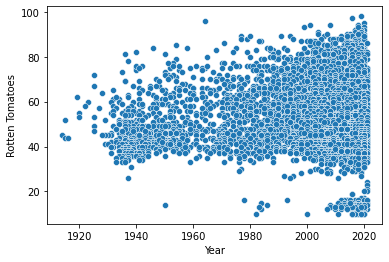

In [19]:
sns.scatterplot(data=df_streaming, x='Year', y='Rotten Tomatoes')

<AxesSubplot:xlabel='Year', ylabel='Rotten Tomatoes'>

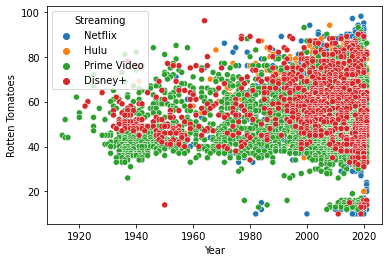

In [20]:
sns.scatterplot(data=df_streaming, x='Year', y='Rotten Tomatoes', hue='Streaming')

### Correlação

In [21]:
df_streaming.drop('Type',axis=1, inplace=True)

<AxesSubplot:>

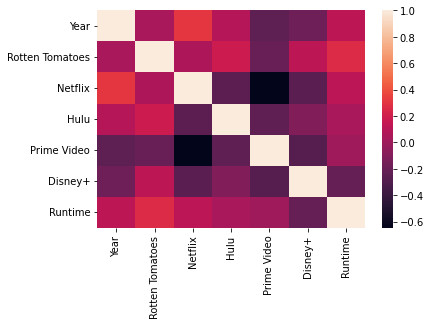

In [22]:
sns.heatmap(df_streaming.corr())